### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量是字色是否一致；因变量是说出颜色的反应时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

* 由于测试数据为同一测试者接受两种不同的条件，所以选择配对样本T检验进行检验  

* H0:字色是否一致对颜色的反应时间没有影响，即两者的总体均值无差异，μ1-μ2=0，μ1为字色一致时是总体反应时间均值；μ2为字色不一致时总体反应时间均值
* H1:字色是否一致对颜色的反应时间有影响，即两者的总体均值有差异，μ1-μ2不等于0


现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [2]:
# 在这里执行你的分析
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 3.1导入数据集

In [3]:
Stroopdata = pd.read_csv("data/stroopdata.csv")
Stroopdata.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### 3.2 清理数据

In [3]:
Stroopdata.isnull().sum()

Congruent      0
Incongruent    0
dtype: int64

* 无缺失值

In [4]:
Stroopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


* 均为浮点型，作为时长的数据格式，无需修改

### 4. 描述性统计—中心性测量与变异性测量

### 4.1 中心性测量

In [5]:
# 均值
print("Congruent的均值=" , np.mean(Stroopdata['Congruent']))
print("Incongruent的均值=" , np.mean(Stroopdata['Incongruent']))

Congruent的均值= 14.051125000000004
Incongruent的均值= 22.01591666666667


In [6]:
#中位数
print("Congruent的中位数=" , np.median(Stroopdata['Congruent']))
print("Incongruent的中位数=" , np.median(Stroopdata['Incongruent']))

Congruent的中位数= 14.3565
Incongruent的中位数= 21.0175


In [7]:
#众数
from scipy.stats import mode
print("Congruent的众数=" , mode(Stroopdata['Congruent']))
print("Incongruent的众数=" , mode(Stroopdata['Incongruent']))

Congruent的众数= ModeResult(mode=array([8.63]), count=array([1]))
Incongruent的众数= ModeResult(mode=array([15.687]), count=array([1]))


Congruent(字色一致)耗时的均值，中位数，众数均比Incongruent(字色不一致)耗时的均值，中位数，众数都小，说明字色一致的反应时间更短一些

### 4.2变异性测量

In [8]:
## 标准差
Stroopdata.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

Incongruent（字色不一致）的离散程度要高于Congruent(字色一致)

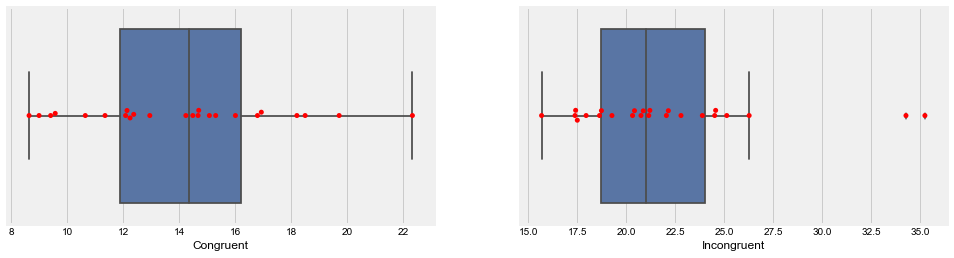

In [9]:
## 箱形图分析
f,ax=plt.subplots(1,2,figsize=(15,4))
sns.set(style="whitegrid")
sns.boxplot(x=Stroopdata["Congruent"],ax=ax[0])
sns.swarmplot(x=Stroopdata["Congruent"], color="red",ax=ax[0])
sns.boxplot(x=Stroopdata["Incongruent"],ax=ax[1])
sns.swarmplot(x=Stroopdata["Incongruent"], color="red",ax=ax[1])

* Incongruent(字色不一致)的反应时间存在两个离群点
* 从箱形图中观察看出，Incongruent去除两个离群点后反应时间较为集中，Congruent的反应时间比Incongruent反应时间要更加离散

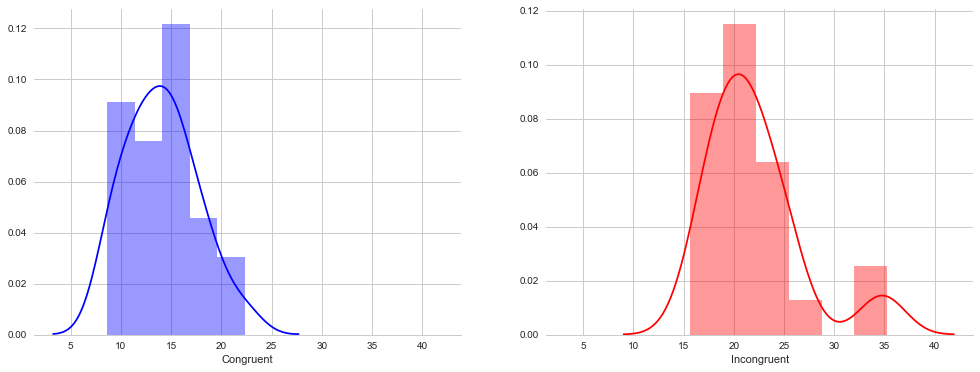

In [10]:
## 直方图分析
f, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)
sns.despine(left=True)
sns.distplot(Stroopdata.Congruent,  color="b",ax=axes[0])
sns.distplot(Stroopdata.Incongruent, color="r", ax=axes[1])

* Congruent字色一致符合（左偏）正态分布（数据量较少，效果不明显）
* Incongruent字色不一致双峰分布，有异常点
* 疑问：类似于这种异常点需要去除吗？独立样本t检验并未要求样本符合正态分布

### 5.假设检验

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [7]:
## 置性水平
β=0.95
##显著性水平
α=1-β
##自由度
df = Stroopdata.count(0)-1
print("置信水平：",β,"显著性水平α:",α,"自由度：",df)

置信水平： 0.95 显著性水平α: 0.050000000000000044 自由度： Congruent      23
Incongruent    23
dtype: int64


#### 计算t临界值
##### 第一种方法—直接计算t临界值

In [9]:
##计算t临界值
Stroopdata['D']=Stroopdata['Congruent']-Stroopdata['Incongruent']
import math
Dx = np.mean(Stroopdata['D'])#差异平均值
Ds = Stroopdata['D'].std()#差异标准差
t = Dx/(Ds/math.sqrt(24))
t

-8.020706944109957

In [8]:
Ds

4.864826910359056

##### 第二种方法—使用scipy函数

In [35]:
from scipy import stats
stats.ttest_rel(Stroopdata.Congruent,Stroopdata.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

采用双尾检测，根据α=0.05，df=23,查表得t值范围为±2.069  
计算出得t临界值为-0.802,不在t值范围内，所以拒绝原假设，说明字色是否一致对反应时间有影响